In [4]:
import json
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import plotly.express as px


In [5]:
# import category json
with open("utils/category_info.json") as f:
    category_info = json.load(f)

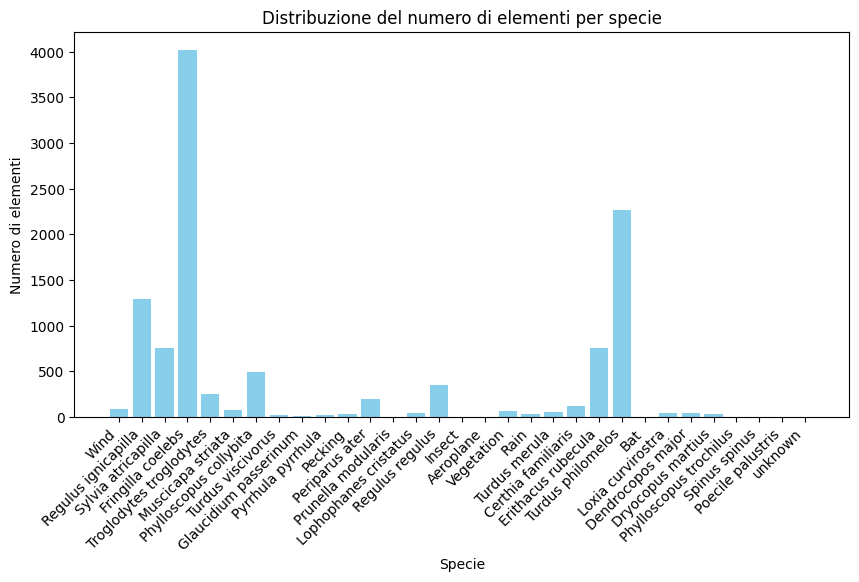

In [6]:
species_counts = {species.split("_")[0]: len(records) for species, records in category_info.items()}

# Creazione del grafico
plt.figure(figsize=(10, 5))
plt.bar(species_counts.keys(), species_counts.values(), color='skyblue')

# Aggiunta di etichette e titolo
plt.xlabel('Specie')
plt.ylabel('Numero di elementi')
plt.title('Distribuzione del numero di elementi per specie')
plt.xticks(rotation=45, ha='right')  # Ruota le etichette per leggibilità

plt.show()


In [7]:
def assign_label(duration):
    if duration <= 1:
        return "0-1s"
    elif duration <= 2:
        return "1-2s"
    else:
        return ">2s"

In [8]:
species_duration = {}
for species_name, segments in category_info.items():
    durations = {"0-1s": 0, "1-2s": 0, ">2s": 0}
    for segm in segments:
        if segm["duration"] <= 1:
            durations["0-1s"] += 1
        elif segm["duration"] <= 2:
            durations["1-2s"] += 1
        else:
            durations[">2s"] += 1
    species_duration[species_name] = durations

In [9]:
data_list = [] 
for species_name, time_data in species_duration.items():
    row = {"Species Name": species_name.split("_")[0]}
    row.update(time_data)
    data_list.append(row)


species_duration_df = pd.DataFrame(data_list)
species_duration_df.iloc[:3]

,Species Name,0-1s,1-2s,>2s
0,Wind,36,16,40
1,Regulus ignicapilla,93,526,678
2,Sylvia atricapilla,19,145,594


In [ ]:
species_duration_df["Total"] = species_duration_df[["0-1s", "1-2s", ">2s"]].sum(axis=1)
species_duration_df = species_duration_df.sort_values("Total", ascending=False).reset_index(drop=True)

color_map = {
    "0-1s": "red",   
    "1-2s": "orange",  
    ">2s": "green"     
}

species_duration_df_long = species_duration_df.melt(id_vars=["Species Name", "Total"], var_name="Duration", value_name="Count")

fig = px.bar(species_duration_df_long, 
             x="Species Name", 
             y="Count", 
             color="Duration", 
             barmode="relative",  # Stack
             title="Segments duration by species",
             color_discrete_map=color_map,
             height=800)

fig.show()

In [24]:
species_duration_df_long.to_csv('utils/species_by_duration.csv', index=True) 

In [28]:
by_dates = []
for species_name, segments in category_info.items():
    dates_count = {segm["file_name"].split("_")[0]: 0 for segm in segments}
    for date in dates_count.keys():
        dates_count[date] = sum(date in segm["file_name"] for segm in segments)
    temp = {"Species Name": species_name.split("_")[0]}
    temp.update(dates_count)
    by_dates.append(temp)
    
by_dates_df = pd.DataFrame(by_dates)
by_dates_df = by_dates_df.fillna(0)
by_dates_df["Total"] = by_dates_df.drop(columns=["Species Name"]).sum(axis=1)
by_dates_df = by_dates_df.sort_values(by="Total", ascending=False).reset_index(drop=True)
by_dates_df_long = by_dates_df.drop(columns=["Total"]).melt(id_vars=["Species Name"], var_name="Duration", value_name="Count")

fig = px.bar(by_dates_df_long, 
             x="Species Name", 
             y="Count", 
             color="Duration", 
             barmode="relative",  # Stack
             title="Segments duration by species",
             height=800)

fig.show()

In [29]:
by_dates_df_long.to_csv('utils/by_dates_df.csv', index=True) 